In [1]:
from Scripts import gating, behaviour
from scipy.optimize import differential_evolution
from skopt import load, dump

In [2]:
## Set Path and Load in Data
path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
data = behaviour.combineBehaviour(path = path, all_key = True, 
                                  subj_key= 0, polarity_key = 0, exp_key = 0)

In [10]:
# Fit Model to Grouped data- 5 delay bins
bnds = ((1, 1), (.4,.6), (1, 2), 
        (.05, .1), (2/1000, 6/1000), 
        (.8/1000, 2/1000), (0.01,1), (1,1)) 
delayBins = 5
modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([data, delayBins]))
dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group')
gating.plotBDIFit(modelFit = modelFit, data = data, params = None, numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = 'group')


[1.00000000e+00 5.99552320e-01 1.00885294e+00 5.98557957e-02
 3.97505939e-03 8.00350318e-04 9.29713787e-01 1.00000000e+00]


TypeError: plotBDIFit() missing 1 required positional argument: 'plotLabel'

In [3]:
# Fit model to repetition data 

# set path and load data
groupData = behaviour.combineBehaviour(path = path, all_key = True, 
                                       subj_key= 0, polarity_key = 0, exp_key = 0) # load data

# Set parameters for fitting
bnds =((1, 1), (.4,.6), (0.5, 1), 
                (.05, .1), (2/1000, 6/1000), (.6/1000, 1/1000), (1,1), (1,1))
delayBins = 5
nback = 5   # number of trials back in sequence

# Loop over choice sequence data, fit individually
for seq in range(nback):
    repData = groupData.loc[groupData['Rep Number']== seq]
    modelFit = differential_evolution(gating.fitBaselineModel, bounds = bnds, args=([repData, delayBins]))
    dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Gated Accumulation\Model Fits\modelfit_group_rep_{seq}')

for seq in range(nback):
    altData = groupData.loc[groupData['Alt Number']== seq]
    modelFit = differential_evolution(gating.fitBaselineModel, bounds = bnds, args=([altData, delayBins]))
    dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Gated Accumulation\Model Fits\modelfit_group_alt_{seq}')

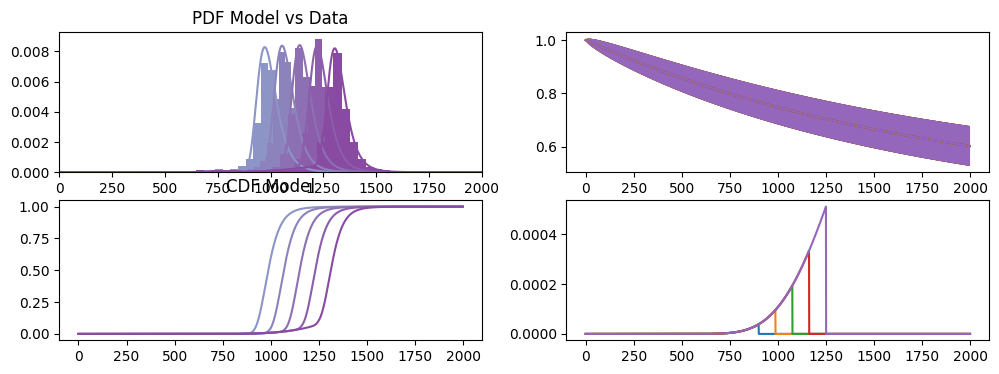

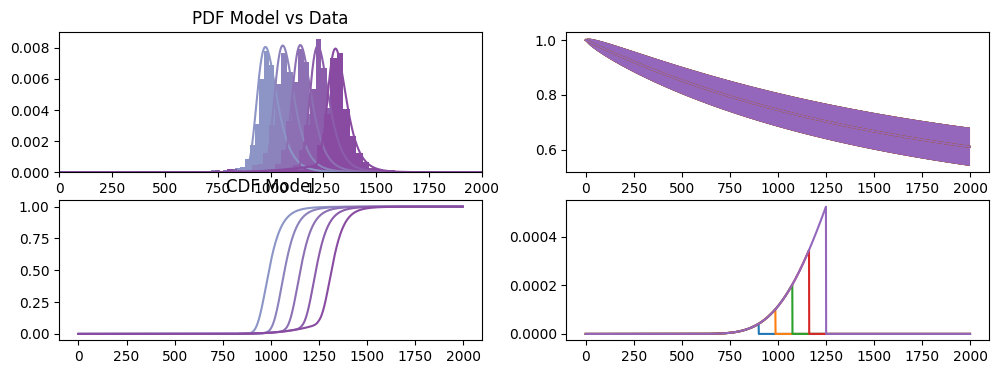

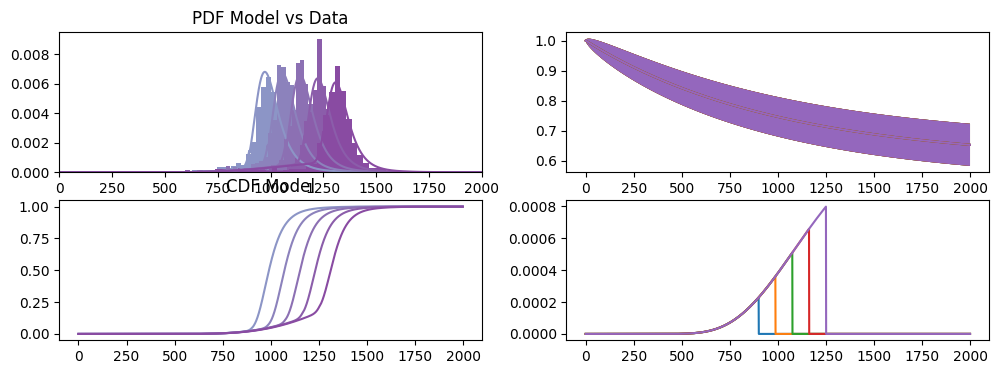

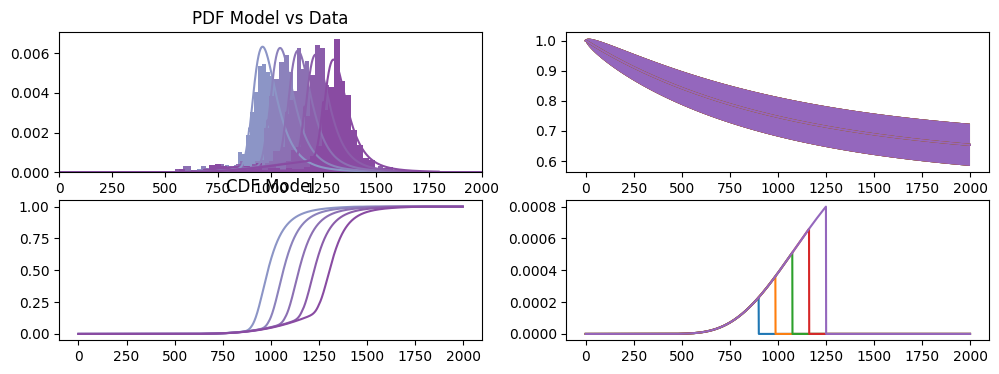

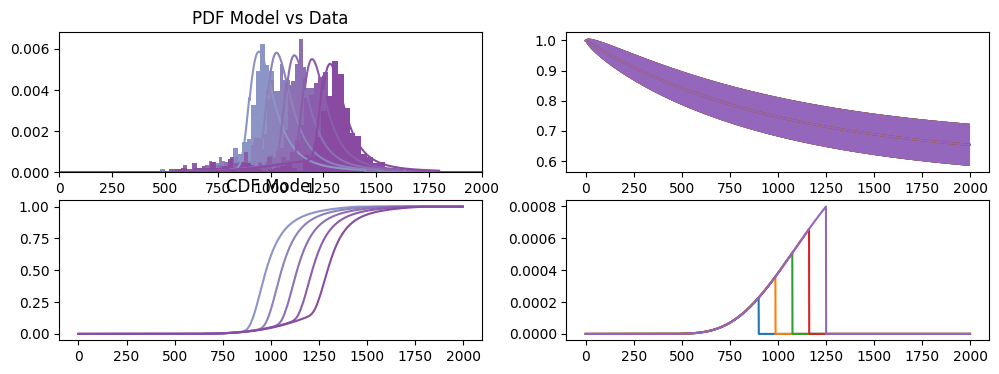

In [6]:
## Plot model output for repetitions

for seq in range(nback): 

    repData = groupData.loc[groupData['Rep Number']== seq]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{seq}')
    gating.plotBDIFit(modelFit = modelFit, params = None, data = repData, 
                   numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = '')
    


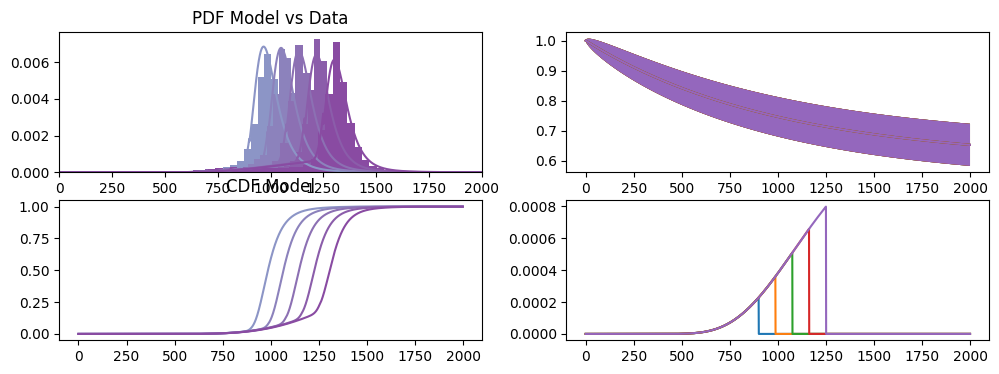

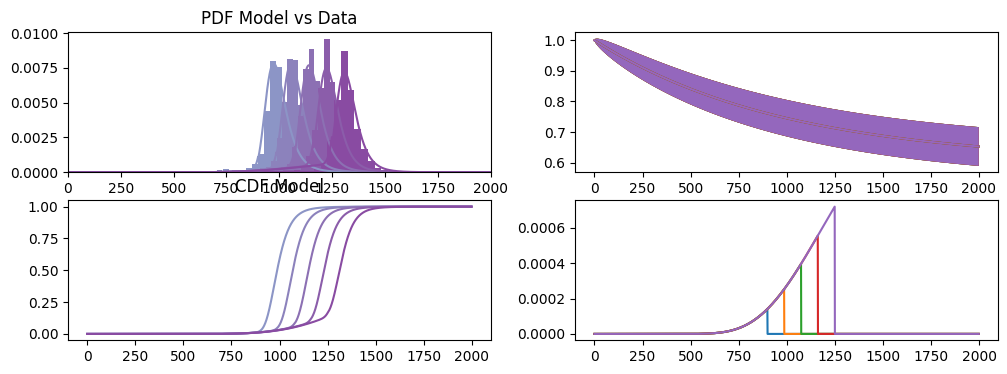

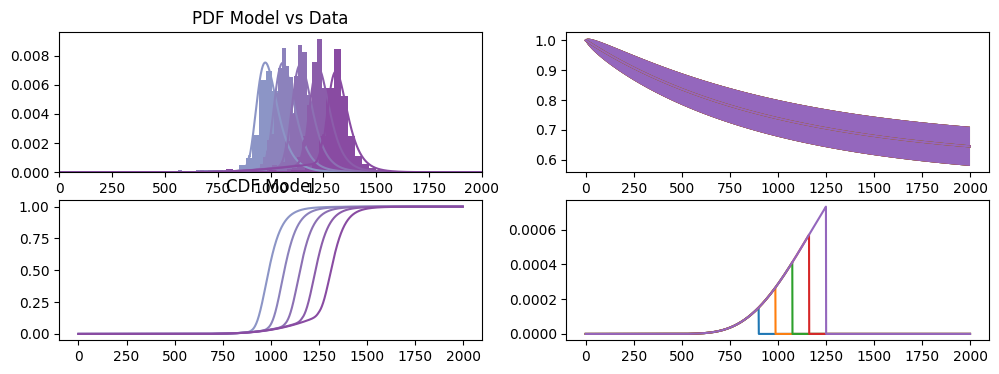

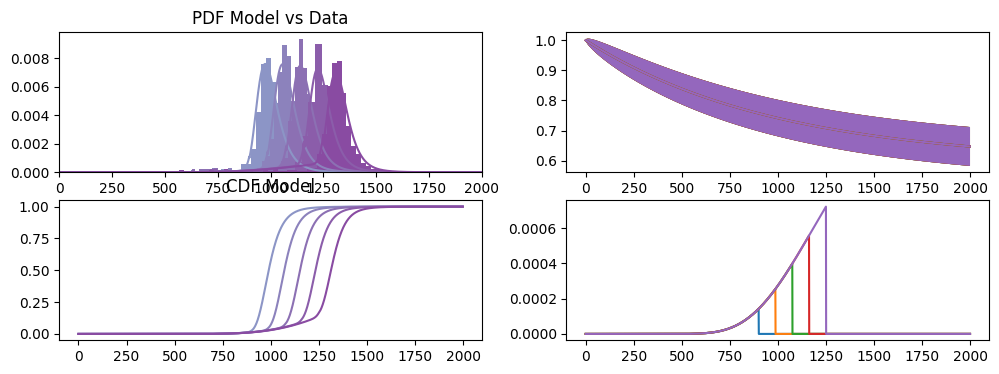

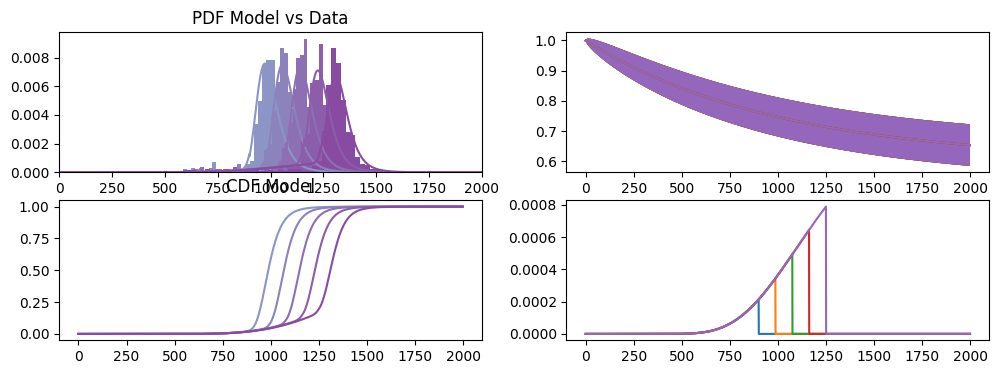

In [8]:
for seq in range(nback): 

    altData = groupData.loc[groupData['Alt Number']== seq]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_alt_{seq}')
    gating.plotBDIFit(modelFit = modelFit, params = None, data = altData, 
                    numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = '')
